# Gradient descent 
is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent 

![image](gradient_descent_demystified.png)

# Example
### Consider the following function:



# $\ f(x)=2 x^2 cos(x)-5 x $

![image](function1.png)

### Steps
Our goal is to find the minimum, the one you see on the right, with x between 3 and 4.

We could, in this simple case, compute the derivative, solve f′(x)=0 , etc. But our goal is to understand gradient descent, so let’s do it!

1. Take a random point x0
2. Compute the value of the slope f′(x0)
3. Walk in the direction opposite to the slope: x1=x0−α∗f′(x0) Here, α is this learning rate. And the minus sign enables us to go in the opposite direction.

In [90]:
import numpy as np
def f(x):
    return 2 * x * x * np.cos(x) - 5 * x
x = [-1] #Initialization 
f(x[0]) 

6.0806046117362795

In [91]:
def df(x):
    return 4 * x * np.cos(x) - 2 * x * x * np.sin(x) - 5

slope = df(x[0])
slope

-5.478267253856766

In [92]:
alpha = 0.05

x.append(x[0] - alpha * slope)
x[1]


-0.7260866373071617

In [93]:
x.append(x[1] - alpha * df(x[1]))
x[2]

-0.4024997370140509

In [94]:
x = [-1.]
for i in range(30):
    x.append(x[i] - alpha * df(x[i]))
x

[-1.0,
 -0.7260866373071617,
 -0.4024997370140509,
 -0.08477906213634434,
 0.18205499002642517,
 0.39684580640116923,
 0.5797318757542436,
 0.7511409760238664,
 0.929843593497496,
 1.1379425635322518,
 1.4100262396071885,
 1.8111367982460322,
 2.4659523010837896,
 3.481091120446543,
 3.9840239754024296,
 3.5799142362878964,
 3.9342838641256046,
 3.6341484369757358,
 3.9000443429762424,
 3.6700891118440984,
 3.874779343531416,
 3.6958142533523755,
 3.8554818096544694,
 3.7149818810428696,
 3.8404639947905914,
 3.729598486599884,
 3.8286534202282554,
 3.7409036078654183,
 3.8193097927393542,
 3.7497262937065647,
 3.8118932296372194]

#### The final value equals to 3.812 which is approximately equals the real value as shown in the graph, notice the convergence of the last 9 values 

In  machine learning what we want to minimize $\ f(x) $ is the cost function "$\ J(w) $ ".

# Linear Regression 

![image](linear_regression.png)


![image](function_linear.png)

 Y = $\phi$ W , 
                     WHERE Y is the predicted value

![image](vectorform.jpeg)

##### Let’s generate some linear-looking data to test this equation on

In [95]:
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
#y1 = 4 + 3 * x  #Uncomment this line to see the data without randomization
x

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

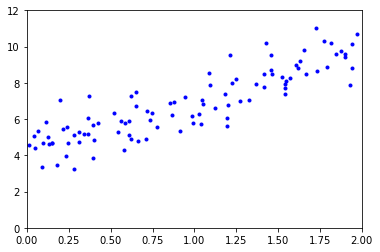

In [96]:
import matplotlib.pyplot as plt
plt.plot(x, y, "b.")
plt.axis([0, 2, 0,12 ])
plt.show()

In [97]:
phi = np.c_[np.ones((100, 1)), x] # add phi_0 = 1 to each instance
phi


array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

# Gradient Descent


### Vector form after derivation of cost function

![image](vectorform2.jpeg)

In [98]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
w = np.random.randn(2,1) # random initialization

In [99]:
for iteration in range(n_iterations):
    gradients = 2/m * phi.T.dot(phi.dot(w) - y)
    w = w - eta * gradients

In [100]:
w

array([[4.21509616],
       [2.77011339]])

## Normal equation
![image](normal_equation.png)

In [101]:
w_best = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y) # applying normal equation


In [102]:
w_best

array([[4.21509616],
       [2.77011339]])

In [103]:
phi_new = np.array([[0], [2]])
phi_new_b = np.c_[np.ones((2, 1)), phi_new] # add phi_0 = 1 to each instance
y_predict = phi_new_b.dot(w_best)
phi_new_b
#y_predict

array([[1., 0.],
       [1., 2.]])

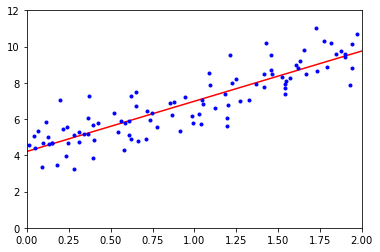

In [105]:
plt.plot(phi_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0,12 ])
plt.show()